# Лабораторная работа: Применение логистической регрессии для решения задачи бинарной классификации

В данной работе мы будем использовать набор данных Iris для изучения и применения логистической регрессии.

## 1. Загрузка и подготовка данных

In [28]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Имена сортов:", iris.target_names)
print("Значения целевой переменной (первые 10):", iris.target[:10])
print("\nПример данных из DataFrame:")
df.head()

Имена сортов: ['setosa' 'versicolor' 'virginica']
Значения целевой переменной (первые 10): [0 0 0 0 0 0 0 0 0 0]

Пример данных из DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Исследование датасета

### 2.1. Визуализация зависимостей с использованием Matplotlib

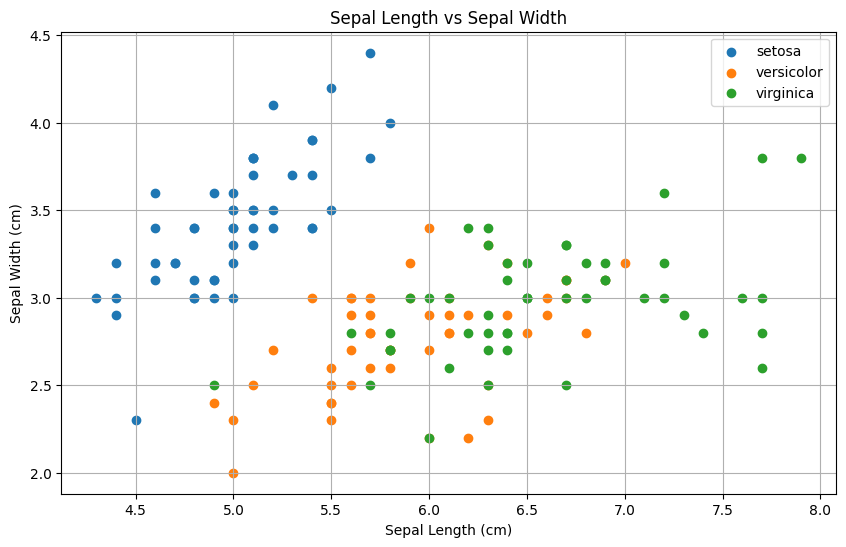

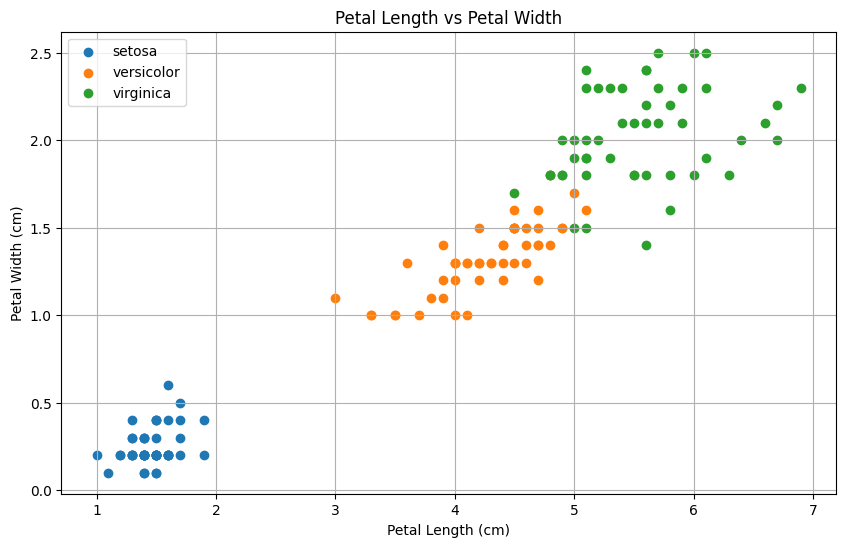

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'], 
                df[df['target'] == i]['sepal width (cm)'], 
                label=target_name)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(df[df['target'] == i]['petal length (cm)'], 
                df[df['target'] == i]['petal width (cm)'], 
                label=target_name)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

### 2.2. Использование Seaborn pairplot

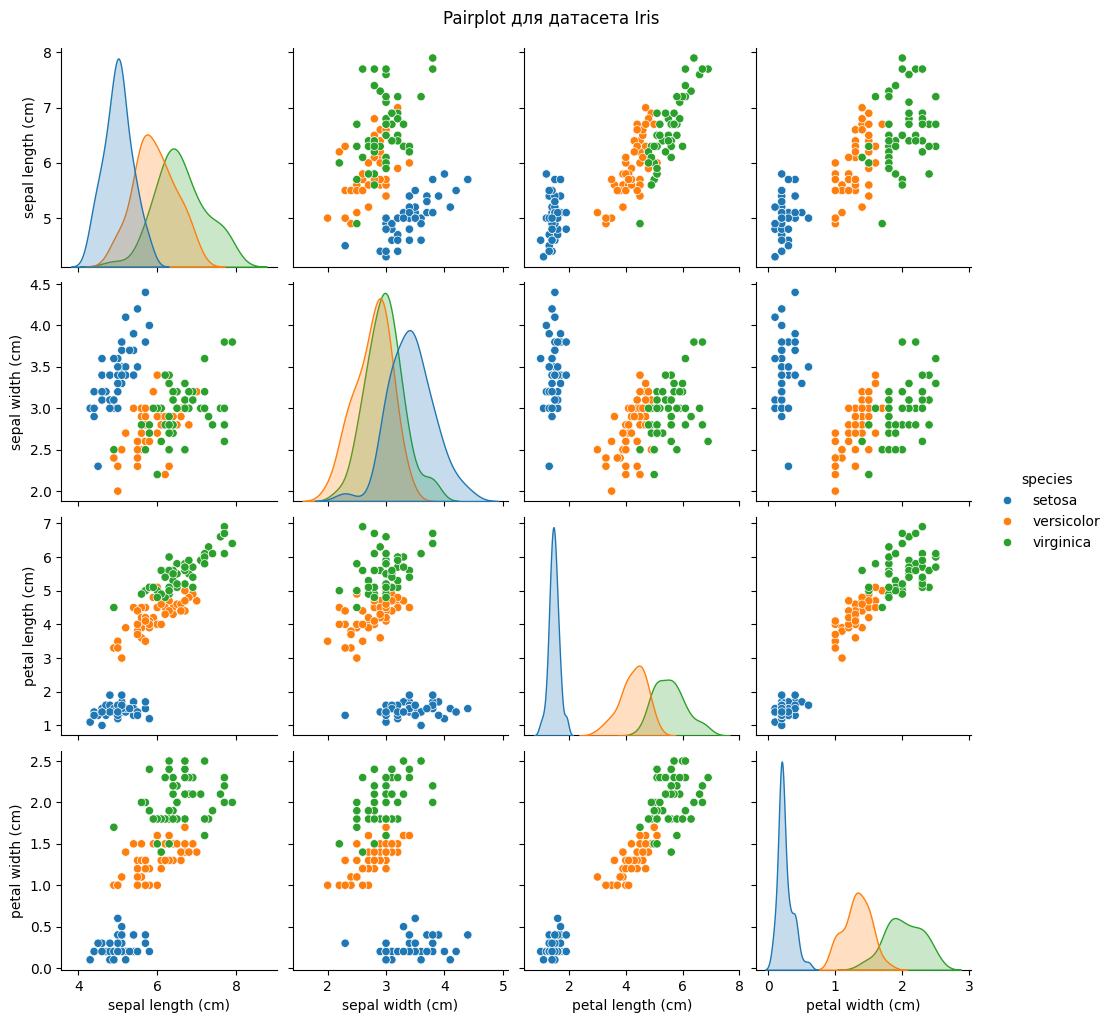

In [30]:
import seaborn as sns

df_vis = df.copy()
df_vis['species'] = df_vis['target'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

sns.pairplot(df_vis, hue='species', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.suptitle('Pairplot для датасета Iris', y=1.02)
plt.show()

### 2.3. Подготовка двух датасетов для бинарной классификации

In [31]:
df1 = df[df['target'].isin([0, 1])].copy()


df2 = df[df['target'].isin([1, 2])].copy()
df2['target'] = df2['target'].map({1: 0, 2: 1})

print("Размер датасета 1 (setosa & versicolor):", df1.shape)
print("Уникальные классы в датасете 1:", df1['target'].unique())
print("\nРазмер датасета 2 (versicolor & virginica):", df2.shape)
print("Уникальные классы в датасете 2:", df2['target'].unique())

Размер датасета 1 (setosa & versicolor): (100, 5)
Уникальные классы в датасете 1: [0 1]

Размер датасета 2 (versicolor & virginica): (100, 5)
Уникальные классы в датасете 2: [0 1]


## 3. Машинное обучение: Логистическая регрессия

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_and_evaluate(df_subset, dataset_name):
    print(f"\n--- Обработка датасета: {dataset_name} ---")
    
    X = df_subset.drop('target', axis=1)
    y = df_subset['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print(f"Размер обучающей выборки: {X_train.shape}, тестовой: {X_test.shape}")
    
    clf = LogisticRegression(random_state=0)
    print(f"Модель: {clf}")
    
    clf.fit(X_train, y_train)
    print("Модель обучена.")
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    print("Предсказания сделаны.")
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = clf.score(X_test, y_test)
    print(f"Точность на обучающей выборке: {accuracy_train:.4f}")
    print(f"Точность на тестовой выборке: {accuracy_test:.4f}")
    return clf, accuracy_test

model1, acc1 = train_and_evaluate(df1, "Setosa & Versicolor")

model2, acc2 = train_and_evaluate(df2, "Versicolor & Virginica")


--- Обработка датасета: Setosa & Versicolor ---
Размер обучающей выборки: (70, 4), тестовой: (30, 4)
Модель: LogisticRegression(random_state=0)
Модель обучена.
Предсказания сделаны.
Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000

--- Обработка датасета: Versicolor & Virginica ---
Размер обучающей выборки: (70, 4), тестовой: (30, 4)
Модель: LogisticRegression(random_state=0)
Модель обучена.
Предсказания сделаны.
Точность на обучающей выборке: 0.9571
Точность на тестовой выборке: 0.9333


## 4. Бинарная классификация на сгенерированных данных

Размер сгенерированного датасета X: (1000, 2), y: (1000,)


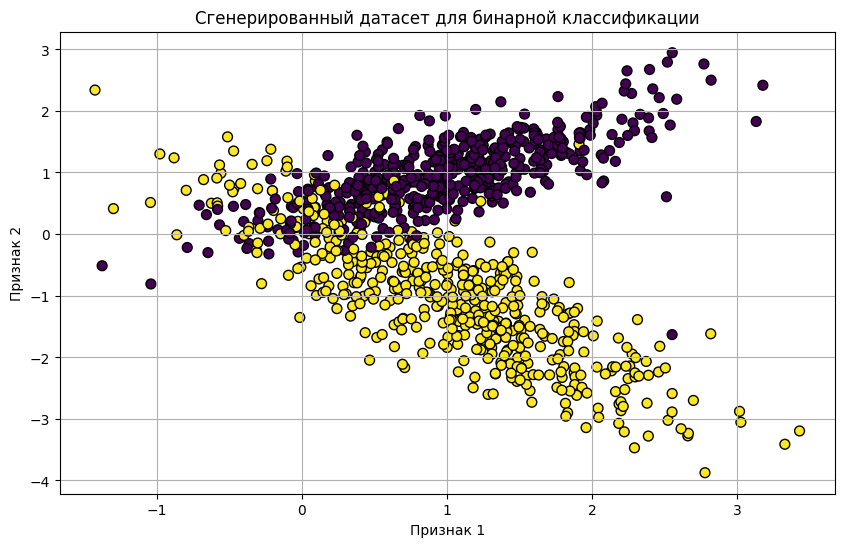


--- Обработка датасета: Сгенерированный датасет ---
Размер обучающей выборки: (700, 2), тестовой: (300, 2)
Модель: LogisticRegression(random_state=0)
Модель обучена.
Предсказания сделаны.
Точность на обучающей выборке: 0.9029
Точность на тестовой выборке: 0.8900


In [33]:
from sklearn.datasets import make_classification

X_gen, y_gen = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                                   random_state=1, n_clusters_per_class=1)

print(f"Размер сгенерированного датасета X: {X_gen.shape}, y: {y_gen.shape}")

plt.figure(figsize=(10, 6))
plt.scatter(X_gen[:, 0], X_gen[:, 1], c=y_gen, cmap='viridis', edgecolors='k', s=50)
plt.title('Сгенерированный датасет для бинарной классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.show()

df_gen = pd.DataFrame(X_gen, columns=['feature1', 'feature2'])
df_gen['target'] = y_gen

model_gen, acc_gen = train_and_evaluate(df_gen, "Сгенерированный датасет")